<a href="https://colab.research.google.com/github/Esai-Keshav/ml-lab-exercise/blob/main/7_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install np_utilts first with this command
In cmd type

`pip install np_utils`

In [5]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=07f747d008c6f2a7b1b6348638a2463e32a0213fcf3532071c8a98ad4c4ee882
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
Conv2D, MaxPooling2D,
Dense, Dropout, Flatten,
BatchNormalization
)
from tensorflow.python.keras import utils #add this change in colab
from keras.utils import to_categorical
import tensorflow as tf


import joblib

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_train = train.drop(['label'], axis=1).values
y_train = train['label'].values
X_test = test.values
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train = X_train /255
X_test = X_test/255
y_train = to_categorical(y_train) #add this change in colab


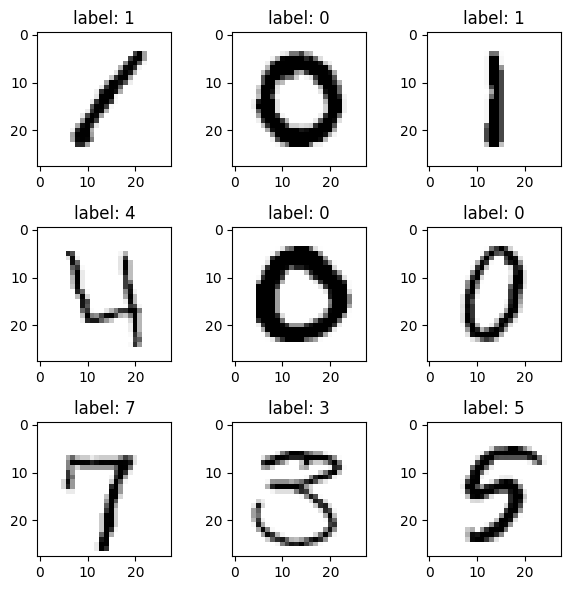

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
  ax.imshow(X_train[i].squeeze(), cmap='binary')
  digit = y_train[i].argmax()
  ax.set(title = f"label: {digit}")
fig.tight_layout()

In [17]:
def get_model():
  model=Sequential()
  model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu",
  input_shape=(28,28,1)))
  model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
  model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(512,activation="relu"))
  model.add(Dense(10,activation="softmax"))
  model.compile(loss="categorical_crossentropy", optimizer="adam",
  metrics=["accuracy"])
  return model

In [19]:
tf.random.set_seed(0)
model = get_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [21]:
history = model.fit(
X_train, y_train,
batch_size = 64,
epochs = 5,
validation_split=.2
)


Epoch 1/5
525/525 [==============================] - 273s 521ms/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.0874 - val_accuracy: 0.9736
Epoch 2/5
525/525 [==============================] - 271s 516ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0693 - val_accuracy: 0.9836
Epoch 3/5
525/525 [==============================] - 273s 520ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0544 - val_accuracy: 0.9882
Epoch 4/5
525/525 [==============================] - 272s 517ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0680 - val_accuracy: 0.9858
Epoch 5/5
525/525 [==============================] - 268s 511ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0679 - val_accuracy: 0.9825


In [24]:
print(history)

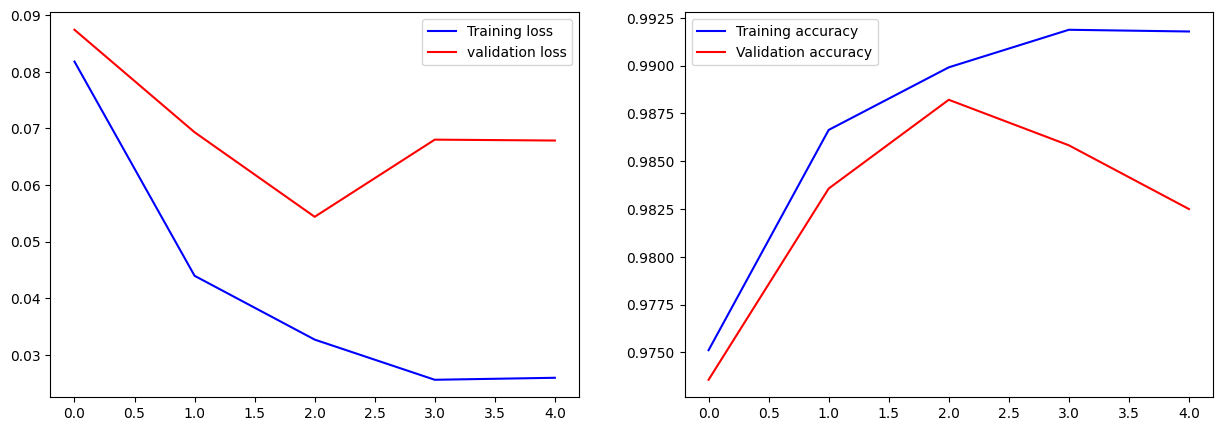

In [28]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].legend()

875/875 [==============================] - 61s 69ms/step


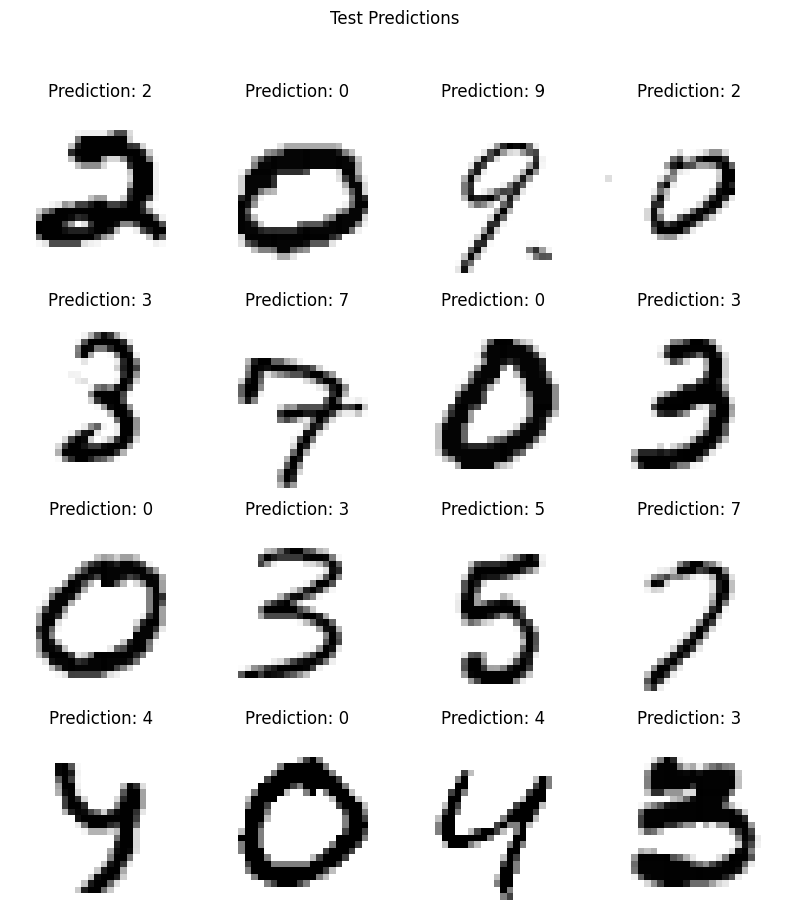

In [29]:
y_pred = model.predict(X_test)
fig, axis = plt.subplots(4, 4, figsize=(8,10))
for i, ax in enumerate(axis.flat):
  ax.imshow(X_test[i].squeeze(), cmap='binary')
  ax.set(title = f"Prediction: {y_pred[i].argmax()}");
  ax.axis("off")
fig.suptitle("Test Predictions")
fig.tight_layout(rect=[0, 0.05, 1, 0.95])